# Heart Disease UCI

In [ ]:
# https://www.kaggle.com/ronitf/heart-disease-uci

In [2]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [3]:
df_heart = pd.read_csv("heart.csv")

1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [4]:
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
cat_col = ['sex', 'cp', 'restecg', 'exang', 'slope', 'ca', 'thal', 'fbs']
num_col = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

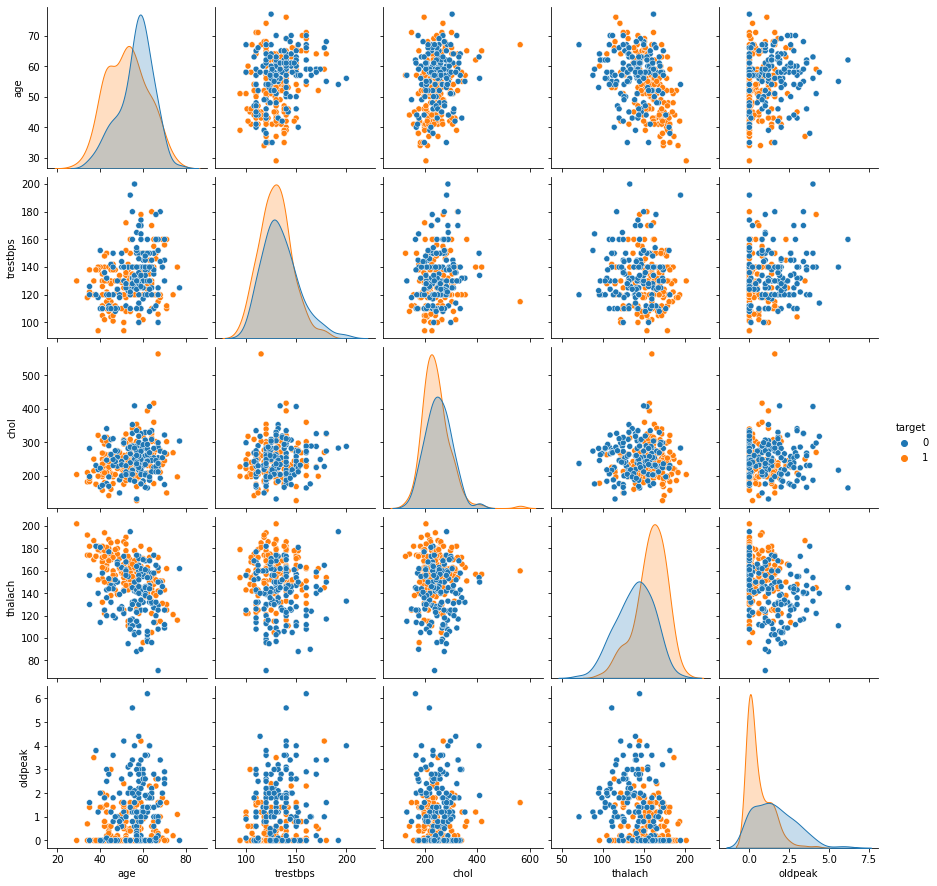

In [6]:
sns.pairplot(df_heart[['age', 'trestbps', 'chol', 'thalach', 'oldpeak',"target"]], hue="target")

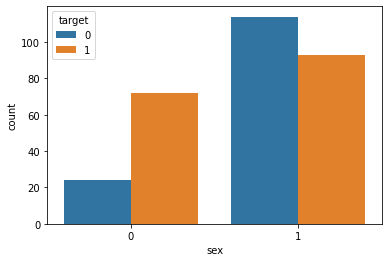

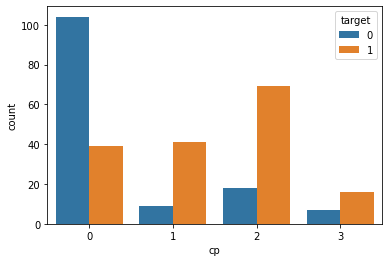

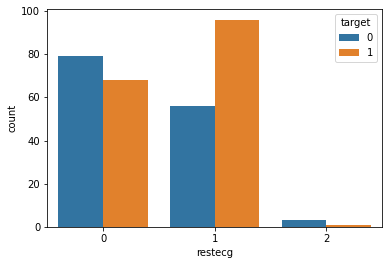

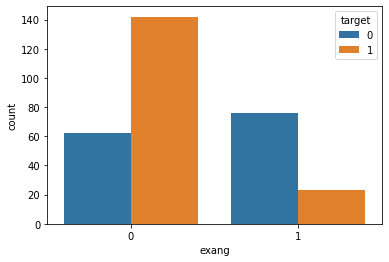

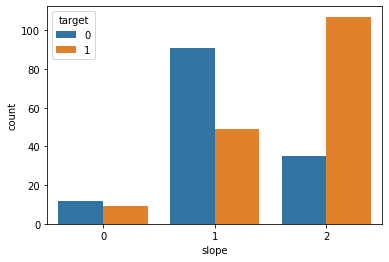

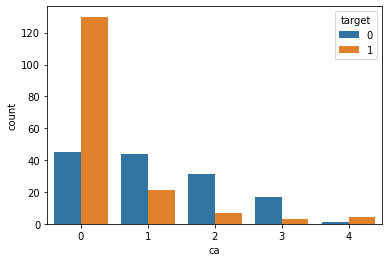

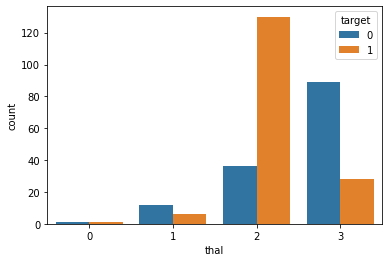

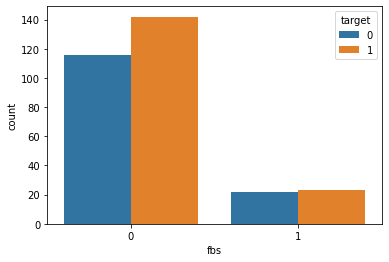

In [7]:
for col in cat_col:
    sns.countplot(x=col, hue="target", data=df_heart)
    plt.show()

In [8]:
X = df_heart.drop(columns=["target"])
y = df_heart["target"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [10]:
categorical_feature = ['sex', 'cp', 'restecg', 'exang', 'slope', 'ca', 'thal', 'fbs']

In [11]:
train_data = lgb.Dataset(data=X_train, label=y_train, free_raw_data=False, categorical_feature=categorical_feature)
test_data = lgb.Dataset(data=X_test, label=y_test, free_raw_data=False, categorical_feature=categorical_feature)

In [12]:
params = {'objective':'binary', "metric":"auc", "num_leaves":3,"learning_rate":0.005, "num_rounds":1000}

In [13]:
evaluation_results = {}
clf = lgb.train(train_set=train_data,
                 params=params,
                 valid_sets=[train_data, test_data], 
                 valid_names=['Train', 'Test'],
                 evals_result=evaluation_results,
                 verbose_eval=200
                )

[LightGBM] [Info] Number of positive: 116, number of negative: 111
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000071 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 239
[LightGBM] [Info] Number of data points in the train set: 227, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.511013 -> initscore=0.044060
[LightGBM] [Info] Start training from score 0.044060
[200]	Train's auc: 0.911774	Test's auc: 0.825397
[400]	Train's auc: 0.925404	Test's auc: 0.856387
[600]	Train's auc: 0.933481	Test's auc: 0.860166
[800]	Train's auc: 0.939694	Test's auc: 0.864701
[1000]	Train's auc: 0.942956	Test's auc: 0.87226


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


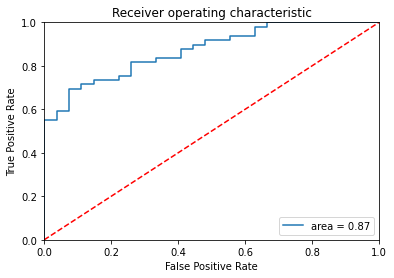

In [14]:
X_test = X_test.astype('float32')
y_test_hat = clf.predict(X_test)
auroc = roc_auc_score(y_test, y_test_hat)
fpr, tpr, thresholds = roc_curve(y_test, y_test_hat)
plt.figure()
plt.plot(fpr, tpr, label='area = %0.2f' % auroc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()